In [0]:
#Import Modeule
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras import optimizers

Using TensorFlow backend.


In [0]:
#Pembuatan Model

Model = Sequential()

#Feature Extraction Layers
#Conv1
Model.add(Convolution2D(96, 11, strides=(4,4), padding='valid', activation='relu', input_shape=(224, 224, 3)))
#Maxpol1
Model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
Model.add(BatchNormalization())
#Conv2
Model.add(Convolution2D(256, 11, strides=(1,1), padding='valid', activation='relu'))
#Maxpol2
Model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
Model.add(BatchNormalization())
#Conv3
Model.add(Convolution2D(384, 3, strides=(1,1), padding='valid', activation='relu'))
Model.add(BatchNormalization())
#Conv4
Model.add(Convolution2D(384, 3, strides=(1,1), padding='valid', activation='relu'))
Model.add(BatchNormalization())
#Conv5
Model.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation='relu'))
#Maxpol3
Model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
Model.add(BatchNormalization())


#Flatten Layers
Model.add(Flatten())

#Fully Connected Layers
Model.add(Dense(4096, activation='relu'))
Model.add(Dropout(0.4))
Model.add(BatchNormalization())
Model.add(Dense(4096, activation='relu'))
Model.add(Dropout(0.4))
Model.add(BatchNormalization())
Model.add(Dense(1000, activation='relu'))
Model.add(Dropout(0.2))
Model.add(BatchNormalization())
Model.add(Dense(3, activation='softmax'))

Model.compile(optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 384)        

In [0]:
#Layer List
for i, layer in enumerate(Model.layers):
  print(i, layer.name)

0 conv2d_1
1 max_pooling2d_1
2 batch_normalization_1
3 conv2d_2
4 max_pooling2d_2
5 batch_normalization_2
6 conv2d_3
7 batch_normalization_3
8 conv2d_4
9 batch_normalization_4
10 conv2d_5
11 max_pooling2d_3
12 batch_normalization_5
13 flatten_1
14 dense_1
15 dropout_1
16 batch_normalization_6
17 dense_2
18 dropout_2
19 batch_normalization_7
20 dense_3
21 dropout_3
22 batch_normalization_8
23 dense_4


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#Data Preprocessing
traingen = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2, zoom_range=0.2)
validgen = ImageDataGenerator(rescale=1./255)


trainset = traingen.flow_from_directory('/content/drive/My Drive/GRANAT/Image Classification/train', target_size=(224, 224), batch_size=20, class_mode='categorical')
validset = validgen.flow_from_directory('/content/drive/My Drive/GRANAT/Image Classification/valid', target_size=(224,224), batch_size=20, class_mode='categorical')

Found 600 images belonging to 4 classes.
Found 150 images belonging to 3 classes.


In [0]:
trainset.class_indices

{'.ipynb_checkpoints': 0, 'cherry': 1, 'strawberry': 2, 'tomatto': 3}

In [0]:
#CheckPoint
from keras.callbacks import ModelCheckpoint

In [0]:
checkpoint = ModelCheckpoint('/content/drive/My Drive/GRANAT/Image Classification/train/BestWeight_Alexnet.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)

In [0]:
history = Model.fit_generator(trainset, epochs=100, verbose=1, validation_data=validset, callbacks=[checkpoint], use_multiprocessing=True)

Epoch 1/100
30/30 [==============================] - 11s 375ms/step - loss: 0.2248 - accuracy: 0.9300 - val_loss: 0.3200 - val_accuracy: 0.9400

Epoch 00001: val_accuracy improved from -inf to 0.94000, saving model to /content/drive/My Drive/GRANAT/Image Classification/train/BestWeight_Alexnet.hdf5
Epoch 2/100
30/30 [==============================] - 10s 344ms/step - loss: 0.1639 - accuracy: 0.9467 - val_loss: 0.2346 - val_accuracy: 0.8733

Epoch 00002: val_accuracy did not improve from 0.94000
Epoch 3/100
30/30 [==============================] - 11s 365ms/step - loss: 0.1904 - accuracy: 0.9217 - val_loss: 0.1072 - val_accuracy: 0.8800

Epoch 00003: val_accuracy did not improve from 0.94000
Epoch 4/100
30/30 [==============================] - 11s 358ms/step - loss: 0.1433 - accuracy: 0.9467 - val_loss: 0.4573 - val_accuracy: 0.9200

Epoch 00004: val_accuracy did not improve from 0.94000
Epoch 5/100
30/30 [==============================] - 11s 357ms/step - loss: 0.1151 - accuracy: 0.958

In [0]:
Model.save('/content/drive/My Drive/GRANAT/Image Classification/train/BestModel_Alexnet.hdf5')

In [0]:
from keras.utils import plot_model

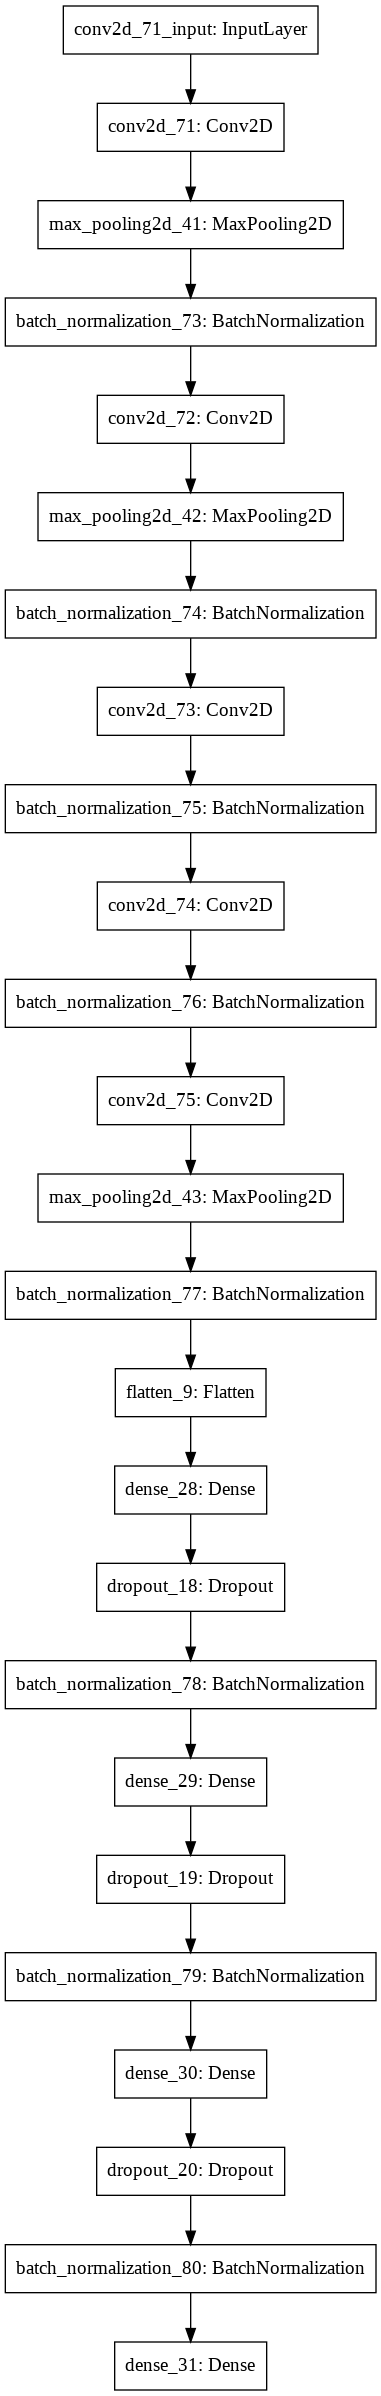

In [0]:
plot_model(Model, to_file='/content/drive/My Drive/GRANAT/Image Classification/train/Plot_Alexnet.png')

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


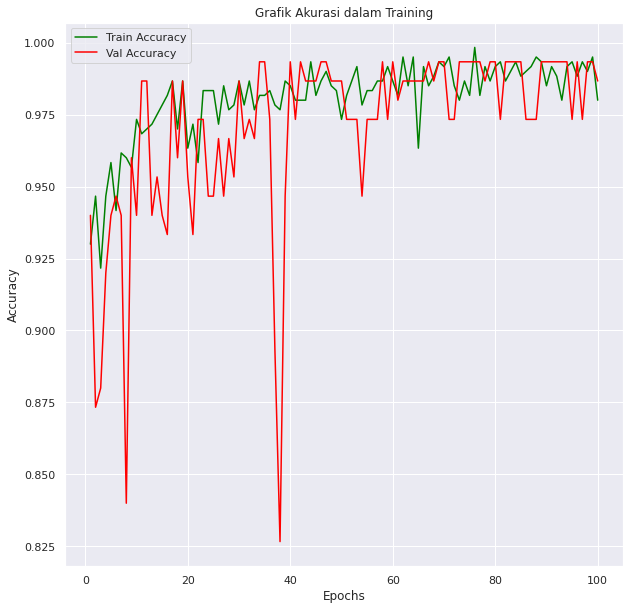

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 101)


plt.figure(figsize=(10,10))
plt.plot(epochs, acc, color='green', label='Train Accuracy')
plt.plot(epochs, val_acc, color='red', label='Val Accuracy')
plt.title("Grafik Akurasi dalam Training")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()


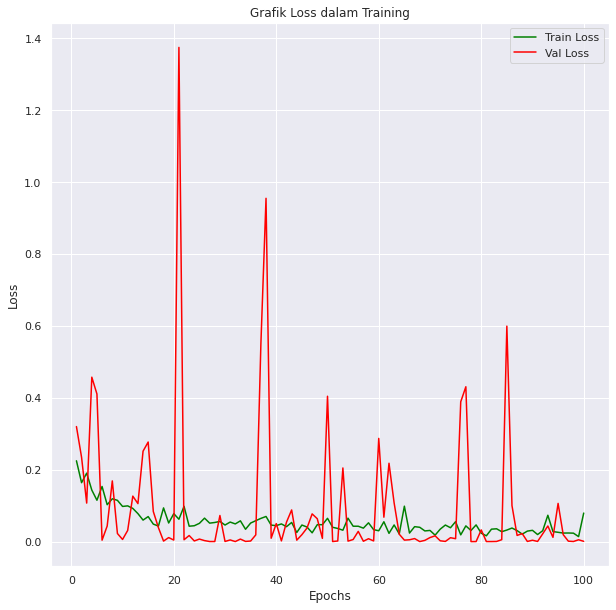

In [0]:
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, color='green', label='Train Loss')
plt.plot(epochs, val_loss, color='red', label='Val Loss')
plt.title("Grafik Loss dalam Training")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [0]:
from keras.preprocessing import image
import numpy as np
from keras.models import load_model

In [0]:
Model = load_model('/content/drive/My Drive/GRANAT/Image Classification/train/BestModel_Alexnet.hdf5')

In [0]:
def classGambar(path):
  file = image.load_img(path=path, target_size=(224, 224))
  img = image.img_to_array(file)
  img = np.expand_dims(img, axis=0)
  img = img/255
  prediction = Model.predict_classes(img)
  if prediction ==0:
    classname="cherry"
  elif prediction==1:
    classname="strawberry"
  else:
    classname="tomatto"
  plt.figure(figsize=(7,7))
  plt.imshow(file)
  plt.axis('off')
  plt.title(classname)
  plt.show()

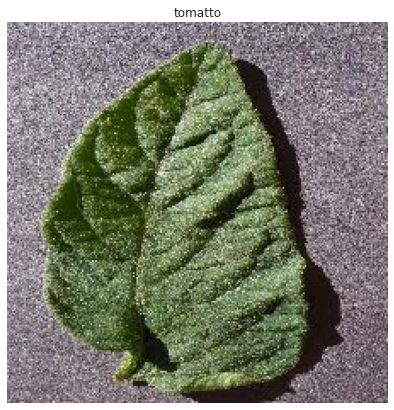

In [0]:
classGambar('/content/drive/My Drive/GRANAT/Image Classification/test/cf021ef4-2bde-4984-8604-c813cb195fe4___RS_HL 0490.JPG')

In [0]:
import glob
import shutil

In [0]:
#Move Image by Class
dataset = glob.glob('/content/drive/My Drive/GRANAT/Image Classification/test/*.JPG')
for i in dataset:
  file = image.load_img(path=i, target_size=(224, 224))
  img = image.img_to_array(file)
  img = np.expand_dims(img, axis=0)
  img = img/255
  prediksi = Model.predict_classes(img)
  if prediksi ==0:
    classname="cherry"
    shutil.move(i, '/content/drive/My Drive/GRANAT/Image Classification/test/cherry')
  elif prediksi==1:
    classname="strawberry"
    shutil.move(i, '/content/drive/My Drive/GRANAT/Image Classification/test/strawberry')
  else:
    classname="tomatto"
    shutil.move(i, '/content/drive/My Drive/GRANAT/Image Classification/test/tomatto')
  print(classname)

strawberry
cherry
strawberry
strawberry
strawberry
cherry
strawberry
cherry
cherry
tomatto
cherry
cherry
tomatto
tomatto
tomatto
strawberry
strawberry
strawberry
strawberry
strawberry
strawberry
strawberry
strawberry
strawberry
strawberry
